In [16]:
import cv2

# Función callback para los trackbars
def on_change(value):
    # Aplicar el detector de bordes Canny a la imagen
    edges = cv2.Canny(img_gris, cv2.getTrackbarPos("Umbral Mínimo", "Ajuste Canny"),
                      cv2.getTrackbarPos("Umbral Máximo", "Ajuste Canny"))

    # Mostrar la imagen con los bordes detectados
    cv2.imshow("Ajuste Canny", edges)

# Cargamos la imagen
image_path = "pel.png"  # Reemplaza "tu_imagen.jpg" con la ruta de tu imagen
image = cv2.imread(image_path)
img_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Redimensionar la imagen a un tamaño más pequeño
resize_width = 585
resize_height = 471
img_gris = cv2.resize(image, (resize_width, resize_height))

# Crear una ventana con trackbars
cv2.namedWindow("Ajuste Canny")
cv2.resizeWindow("Ajuste Canny", 585, 471)  # Ajusta el tamaño según tus preferencias

# Crear trackbars para el umbral mínimo y máximo
cv2.createTrackbar("Umbral Mínimo", "Ajuste Canny", 0, 255, on_change)
cv2.createTrackbar("Umbral Máximo", "Ajuste Canny", 0, 255, on_change)

# Llama a on_change con valores iniciales
on_change(0)

# Mostrar la imagen original
cv2.imshow("Ajuste Canny", image)

# Esperar a que el usuario ajuste los valores con los trackbars
cv2.waitKey(0)
cv2.destroyAllWindows()


ACTUAL PROGRAMA

8
2803
12
1830
7
2583
10
1614


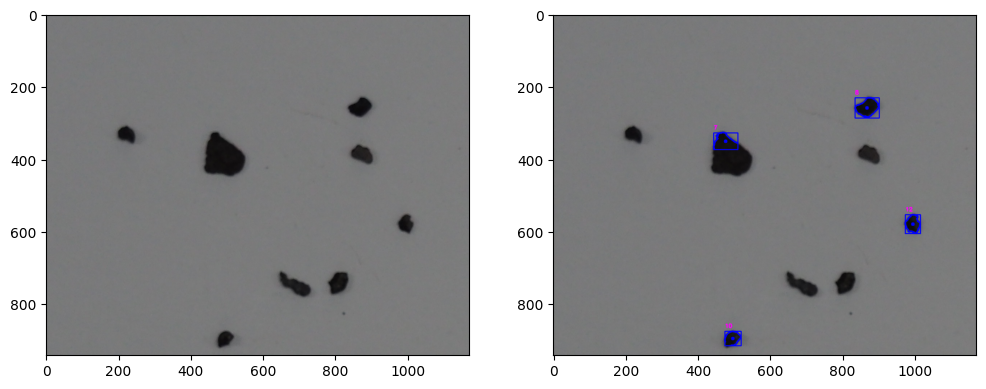

In [3]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math

colorFinder = ColorFinder(False)
hsvValsBlack = {'hmin':0, 'smin':0, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 102}

totalValue=0
def preProcessing(img):
    imgPre = img
    cv2.GaussianBlur(img, (5,5), 3)
    
    # imgPre = cv2.Canny(imgPre, 38, 70)
    imgPre = cv2.Canny(imgPre, 40, 180)

    kernel = np.ones((1,1), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)
    
    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    imS = cv2.resize(imgPre, (585, 471))                # Resize image
# cv2.imshow("output", imS)  
    
    # cv2.imshow("hjjhjh", imS)
    return imgPre


img = cv2.imread("tar.png")
# img = cv2.imread("monedas5.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=30)

# if conFound:
#     for contour in conFound:
#         peri = cv2.arcLength(contour['cnt'], True)
#         approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
#         print(len(approx))
#         x, y, w, h = contour['bbox']
#         imgCrop = img[y:y+h, x:x+w]
#         cv2.imshow("nada", imgCrop)
#         cv2.waitKey(1500)

#         # circles = cv2.HoughCircles(img_gris, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
#         # if circles is not None:
#         #     circles = np.uint16(np.around(circles))
#         #     for circle in circles[0, :]:
#         #         center = (circle[0], circle[1])
#         #         radius = circle[2]
#         #         # Draw the circle outline
#         #         cv2.circle(img, center, radius, (0, 255, 0), 2)
#         #         # print("circulos: " + str(len(circles[0, :])))

if conFound:
    for contour in conFound:
        peri = cv2.arcLength(contour['cnt'], True)
        approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
        print(len(approx))
        area = contour['area']
        x, y, w, h = contour['bbox']
        imgCrop = img[y:y+h, x:x+w]
        imgCropGris = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
        imgColor, mask = colorFinder.update(imgCrop, hsvValsBlack)
        pixelsCountBlack = cv2.countNonZero(mask)

        circles = cv2.HoughCircles(imgCropGris, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for circle in circles[0, :]:
                center = (circle[0], circle[1])
                radius = circle[2]
                # Draw the circle outline
                cv2.circle(imgCrop, center, radius, (0, 255, 0), 2)
                print("circulos: " + str(len(circles[0, :])))
        else:
            print(pixelsCountBlack)

        cv2.imshow("nada", imgCrop)
        cv2.waitKey(1500)

# while (True):

#     if (cv2.waitKey(5000) == 27):
#         break

       
cv2.destroyAllWindows()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# img_rgb = cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb) 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.subplot(1, 2, 2)
img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 


COPIA DEL OTRO. EN BUSCA DE LOS CONTORNOS Y IMGCROP

Area=6919.5
Area=6278.0
Area=5960.0
Area=5506.5
Area=4629.5
Area=4160.5
Area=3666.0
Area=3129.0
Area=2848.5
Area=815.0
Area=643.0
Total en monedas: 0
[[[718 775]]

 [[718 776]]

 [[717 777]]

 [[715 777]]

 [[715 779]]

 [[714 780]]

 [[712 780]]

 [[711 781]]

 [[709 781]]

 [[709 782]]

 [[707 784]]

 [[707 785]]

 [[705 787]]

 [[702 787]]

 [[702 788]]

 [[701 789]]

 [[700 789]]

 [[700 790]]

 [[699 791]]

 [[697 791]]

 [[696 792]]

 [[694 792]]

 [[693 793]]

 [[692 793]]

 [[691 794]]

 [[690 794]]

 [[686 798]]

 [[686 799]]

 [[684 801]]

 [[684 802]]

 [[681 805]]

 [[680 805]]

 [[680 807]]

 [[679 808]]

 [[678 808]]

 [[678 810]]

 [[677 811]]

 [[677 815]]

 [[676 816]]

 [[675 816]]

 [[675 818]]

 [[674 819]]

 [[673 819]]

 [[672 820]]

 [[671 820]]

 [[671 821]]

 [[668 824]]

 [[668 826]]

 [[666 828]]

 [[665 828]]

 [[665 829]]

 [[664 830]]

 [[661 830]]

 [[660 831]]

 [[660 836]]

 [[662 836]]

 [[662 834]]

 [[663 833]]

 [[665 833]]

 [[666 834]]

 [[666 836

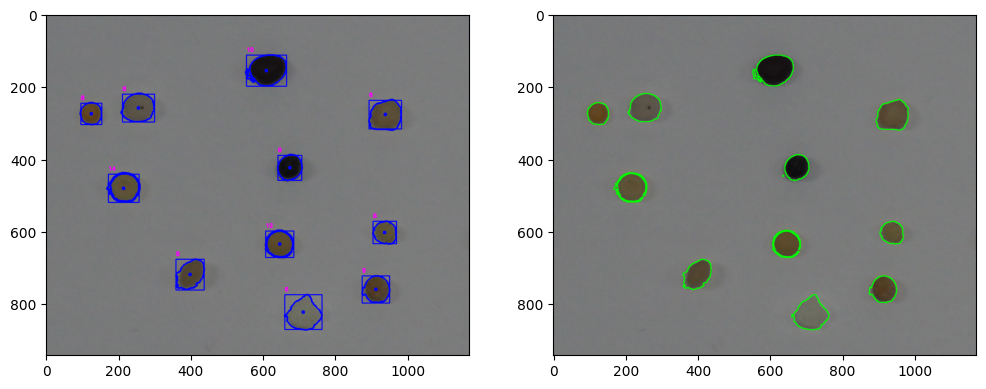

In [6]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math

colorFinder = ColorFinder(False)
hsvValsBlack = {'hmin':0, 'smin':0, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 102}

totalValue=0


def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 5, 20)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("pel.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=300)
contours, _ = cv2.findContours(imgPre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



if conFound:
    for contour in conFound:
        peri = cv2.arcLength(contour['cnt'], True)
        approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
        if len(approx) >5:
            print('Area=' + str(contour['area']) )
            # print('area cm2' + str(calculoPx2toCm2(img, contour['area'])))

            area = contour['area']
            x, y, w, h = contour['bbox']
            imgCrop = img[y:y+h, x:x+w]
            imgCropGris = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
            imgColor, mask = colorFinder.update(imgCrop, hsvValsBlack)

            pixelsCountBlack = cv2.countNonZero(mask)

            # circles = cv2.HoughCircles(imgCropGris, cv2.HOUGH_GRADIENT, dp=1, minDist=15, param1=40, param2=30, minRadius=0, maxRadius=0)
            # if circles is not None:
            #     circles = np.uint16(np.around(circles))
            #     for circle in circles[0, :]:
            #         center = (circle[0], circle[1])
            #         radius = circle[2]
            #         # Draw the circle outline
            #         cv2.circle(imgCrop, center, radius, (0, 255, 0), 2)
            #         print("circulos: " + str(len(circles[0, :]))) 


            # # print()
            # # print(totalValue)
            # cv2.imshow("nada", imgCrop)
            # if cv2.waitKey(5000) == 27:
            #     continue

oval_contours = []
for contour in contours:
    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        (x, y), (major, minor), angle = ellipse
        aspect_ratio = major / minor

        if 0.3 <= aspect_ratio <= 1:
            oval_contours.append(contour)
            cv2.drawContours(img, oval_contours, -1, (0, 255, 0), 2)

# Dibuja las elipses ovaladas en la imagen original
img_ovals = cv2.drawContours(img, oval_contours, -1, (0, 255, 0), 2)


        # print(len(approx))
# Dibuja las elipses ovaladas en la imagen original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
img_rgb2 = cv2.cvtColor(img_ovals, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(img_rgb2) 
cv2.waitKey(0)
cv2.destroyAllWindows()

print('Total en monedas: ' + str(totalValue))
# print(conFound[0]['cnt'])
# print('---------------\n')
print(contours[0])
print('---------------\n')
for x in contours:
    print(x)
    break

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
# cv2.imshow("output", imS)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   



CLASIFICACIÓN  por fragmento y luego por forma y color (no conseguida)


0

0

0
Soy pellet

0
Soy pellet

0

0
Soy Fragmento

0

0
Total Pellet: 2
Total Alquitran: 0
Total Fragmentos: 1


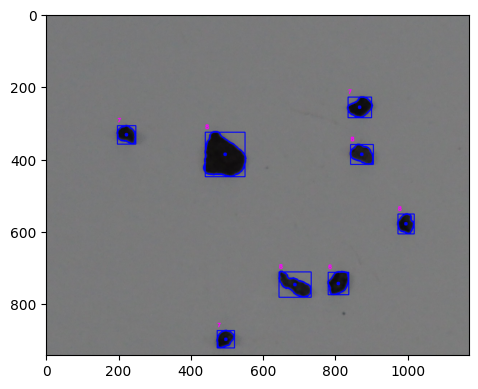

In [2]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math

colorFinder = ColorFinder(False)
# hsvValsBlack = {'hmin':0, 'smin':0, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 102}
hsvValsBlack = {'hmin':47, 'smin':19, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 255}


totalValue=0


def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 5, 20)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("tar.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=300)
ovalContours, _ = cv2.findContours(imgPre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

numPel=0
numFra=0
numAlq=0

numIter =0
if conFound:
    for contour in conFound:
        peri = cv2.arcLength(contour['cnt'], True)
        approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
        if len(approx) >5:
            # print('Area=' + str(contour['area']) )
            # print('area cm2' + str(calculoPx2toCm2(img, contour['area'])))

            area = contour['area']
            x, y, w, h = contour['bbox']
            imgCrop = img[y:y+h, x:x+w]
            imgColor, mask = colorFinder.update(imgCrop, hsvValsBlack)
            pixelsCountBlack = cv2.countNonZero(mask)
            # print('pixeles negros en ese contorno' + str(pixelsCountBlack))

            # ¿Es redondo?
            if len(ovalContours[numIter]) >= 5:
                ellipse = cv2.fitEllipse(ovalContours[numIter])
                (x, y), (major, minor), angle = ellipse
                aspect_ratio = major / minor

                if 0.7 <= aspect_ratio <= 1.3:
                    numPel += 1            
                    print('Soy pellet')
            else:
            #     # ¿Es negro?
                if (pixelsCountBlack > 1000):
                    numAlq+=1
                    print('Soy ALquitrán')
                else:
                    numFra += 1
                    print('Soy Fragmento')




            print()
            print(totalValue)
            cv2.imshow("nada", imgCrop)
            numIter += 1
            if cv2.waitKey(5000) == 27:
                continue


        # print(len(approx))
# Dibuja las elipses ovaladas en la imagen original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
# img_rgb2 = cv2.cvtColor(img_ovals, cv2.COLOR_BGR2RGB)
# plt.subplot(1, 2, 2)
# plt.imshow(img_rgb2) 

print('Total Pellet: ' + str(numPel))
print('Total Alquitran: ' + str(numAlq))
print('Total Fragmentos: ' + str(numFra))

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
# cv2.imshow("output", imS)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   
cv2.waitKey(0)
cv2.destroyAllWindows()


In [40]:
ar = ["a", "b"]
print(ar[1])

b


CLASIFICACION POR OVALO DIRECTAMENTE

14
Soy pellet
Soy pellet
Soy pellet
Soy pellet
Soy pellet
Soy pellet
Total Pellet: 6
Total Alquitran: 0
Total Fragmentos: 0


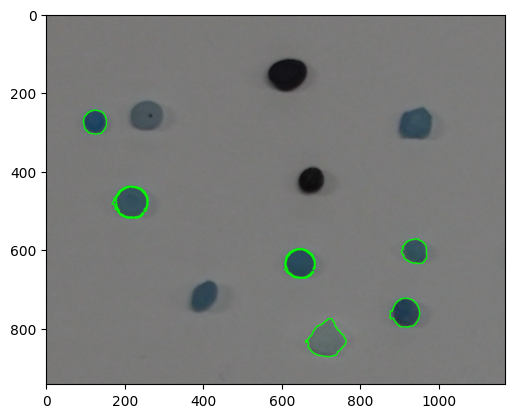

In [8]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math

colorFinder = ColorFinder(False)
# hsvValsBlack = {'hmin':0, 'smin':0, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 102}
hsvValsBlack = {'hmin':47, 'smin':19, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 255}


totalValue=0


def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 5, 20)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("pel.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=300)
ovalContours, _ = cv2.findContours(imgPre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

numPel=0
numFra=0
numAlq=0

numIter =0
print(len(ovalContours))
oval_contours = []
if ovalContours:
    for contour in ovalContours:
            # print('Area=' + str(contour['area']) )
            # print('area cm2' + str(calculoPx2toCm2(img, contour['area'])))
            # print('pixeles negros en ese contorno' + str(pixelsCountBlack))

            # ¿Es redondo?

            if len(contour) >= 5:
                ellipse = cv2.fitEllipse(contour)
                (x, y), (major, minor), angle = ellipse
                aspect_ratio = major / minor

                if 0.9 <= aspect_ratio <= 1.5:
                    numPel += 1            
                    print('Soy pellet')
                    oval_contours.append(contour)
            # else:
            # #     # ¿Es negro?
            #     if (pixelsCountBlack > 1000):
            #         numAlq+=1
            #         print('Soy ALquitrán')
            #     else:
            #         numFra += 1
            #         print('Soy Fragmento')


        # print(len(approx))
# Dibuja las elipses ovaladas en la imagen original
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb) 
# img_rgb2 = cv2.cvtColor(img_ovals, cv2.COLOR_BGR2RGB)
# plt.subplot(1, 2, 2)
# plt.imshow(img_rgb2) 

print('Total Pellet: ' + str(numPel))
print('Total Alquitran: ' + str(numAlq))
print('Total Fragmentos: ' + str(numFra))

cv2.drawContours(img, oval_contours, -1, (0, 255, 0), 2)

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
plt.imshow(img)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   
# cv2.waitKey(0)
# cv2.destroyAllWindows()


14
Total Pellet: 0
Total Alquitran: 0
Total Fragmentos: 0


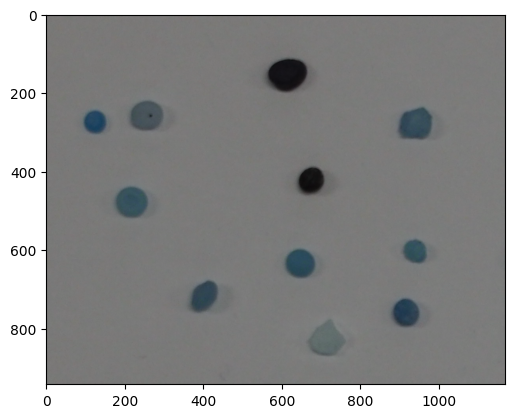

In [12]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math

colorFinder = ColorFinder(False)
# hsvValsBlack = {'hmin':0, 'smin':0, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 102}
hsvValsBlack = {'hmin':47, 'smin':19, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 255}


totalValue=0


def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 5, 20)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("pel.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=300)
ovalContours, _ = cv2.findContours(imgPre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

numPel=0
numFra=0
numAlq=0

numIter =0
print(len(ovalContours))
oval_contours = []
img_cont = np.zeros(img_rgb.shape)
cv2.drawContours(img_rgb, ovalContours, -1, (0,255,0), 3) 

if ovalContours:
    for c in ovalContours:
        area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
        if area > 10:
            #Perímetro delcontorno
            perimetro = cv2.arcLength(c,True)
            #Contenedor alineado con ejes de la imagen
            x,y,w,h = cv2.boundingRect(c)
            #Mínimo contenedor ajustado para el contorno
            rect = cv2.minAreaRect(c)
            #Mínimo círculo que lo contiene
            (cx,cy),radio = cv2.minEnclosingCircle(c)
            #Elipse ajustada al contorno
            if c.shape[0] > 5:
                elipse = cv2.fitEllipse(c)
                #Para determinadas tareas nos interesará mostrar estos valores
                #print(area, perimetro, rect, cx,cy,radio, elipse)
            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

print('Total Pellet: ' + str(numPel))
print('Total Alquitran: ' + str(numAlq))
print('Total Fragmentos: ' + str(numFra))

# cv2.drawContours(img, oval_contours, -1, (0, 255, 0), 2)

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
plt.imshow(img)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   
# cv2.waitKey(0)
# cv2.destroyAllWindows()


AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
soy pellet
Total Pellet: 29
Total Alquitran: 1
Total Fragmentos: 25
Total Objetos Examinados: 55


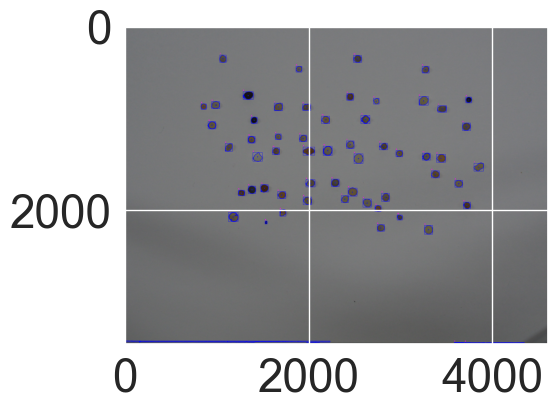

In [22]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math

colorFinder = ColorFinder(False)
hsvValsBlack = {'hmin':47, 'smin':19, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 255}


totalValue=0


def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 5, 20)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("fragment-03-olympus-10-01-2020.JPG")
img = cv2.imread("pellet-03-olympus-10-01-2020.JPG")
# img = cv2.imread("tar-03-olympus-10-01-2020.JPG")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=300)
ovalContours, _ = cv2.findContours(imgPre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

numPel=0
numFra=0
numAlq=0

numIter =0
y_pred = []
if conFound:
    for contour in conFound:

        peri = cv2.arcLength(contour['cnt'], True)
        approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
        if len(approx) >5:
            numIter += 1  
            # print('Area=' + str(contour['area']) )
            # print('area cm2' + str(calculoPx2toCm2(img, contour['area'])))

            area = contour['area']
            x, y, w, h = contour['bbox']
            imgCrop = img[y:y+h, x:x+w]
            imgColor, mask = colorFinder.update(imgCrop, hsvValsBlack)
            pixelsCountBlack = cv2.countNonZero(mask)
            # print('pixeles negros en ese contorno' + str(pixelsCountBlack))
            perimetro = cv2.arcLength(contour['cnt'],True)
            # print("Perimetro: " + str(perimetro))
            # print("Area: " + str(area))

            imgCropGris = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
            circles = cv2.HoughCircles(imgCropGris, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=30, minRadius=0, maxRadius=0)
            if circles is not None:
                circles = np.uint16(np.around(circles))
                for circle in circles[0, :]:
                    center = (circle[0], circle[1])
                    radius = circle[2]
                    # Draw the circle outline
                    cv2.circle(imgCrop, center, radius, (0, 255, 0), 2)
                    # print("circulos: " + str(len(circles[0, :])))
                numPel += 1
                y_pred.append(0)
                print("soy pellet")

            else:
                # No es un pellet
                # se calcula la relación area/pixeles negros
                # Si el valor es muy alto es que hay pocos pixeles negros y se puede descartar el alquitrán
                if(pixelsCountBlack !=0 and area/pixelsCountBlack  < 10):
                    numAlq += 1
                    y_pred.append(1)
                else:
                    numFra += 1
                    y_pred.append(2)

            # cv2.imshow("nada", imgCrop)            
            # if cv2.waitKey(5000) == 27:
            #     continue


        # print(len(approx))
# Dibuja las elipses ovaladas en la imagen original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
# img_rgb2 = cv2.cvtColor(img_ovals, cv2.COLOR_BGR2RGB)
# plt.subplot(1, 2, 2)
# plt.imshow(img_rgb2) 

print('Total Pellet: ' + str(numPel))
print('Total Alquitran: ' + str(numAlq))
print('Total Fragmentos: ' + str(numFra))
print('Total Objetos Examinados: ' + str(numIter))

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
# cv2.imshow("output", imS)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   
cv2.waitKey(0)
cv2.destroyAllWindows()


Accuracy (TP/(n))= 0.9629629629629629
Precision (TP/(TP+FP)) = 1.0
Recall (TP/(TP+FN)) = 0.9629629629629629
F1 Score (2*(precision*recall)/(precision+recall)) = 0.9811320754716981


c:\Users\Minerva\anaconda3\envs\VC_P1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(-11.749999999999998, 0.5, 'Anotada')

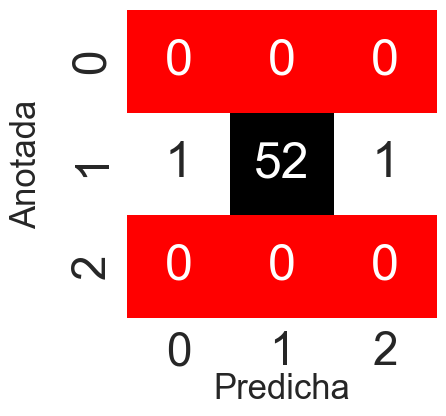

In [18]:

import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 54
nclases = 3

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
# y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador

y = [1 for _ in range(n)]


accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)

CON TODAS LAS IMAGENES

In [ ]:
y_pred = []

In [ ]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math

colorFinder = ColorFinder(False)
hsvValsBlack = {'hmin':47, 'smin':19, 'vmin':0, 'hmax':179, 'smax':255, 'vmax': 255}


totalValue=0


def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 5, 20)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("fragment-03-olympus-10-01-2020.JPG")
img = cv2.imread("pellet-03-olympus-10-01-2020.JPG")
# img = cv2.imread("tar-03-olympus-10-01-2020.JPG")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=300)
ovalContours, _ = cv2.findContours(imgPre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

numPel=0
numFra=0
numAlq=0

numIter =0
if conFound:
    for contour in conFound:

        peri = cv2.arcLength(contour['cnt'], True)
        approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
        if len(approx) >5:
            numIter += 1  
            # print('Area=' + str(contour['area']) )
            # print('area cm2' + str(calculoPx2toCm2(img, contour['area'])))

            area = contour['area']
            x, y, w, h = contour['bbox']
            imgCrop = img[y:y+h, x:x+w]
            imgColor, mask = colorFinder.update(imgCrop, hsvValsBlack)
            pixelsCountBlack = cv2.countNonZero(mask)
            # print('pixeles negros en ese contorno' + str(pixelsCountBlack))
            perimetro = cv2.arcLength(contour['cnt'],True)
            # print("Perimetro: " + str(perimetro))
            # print("Area: " + str(area))

            imgCropGris = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
            circles = cv2.HoughCircles(imgCropGris, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=30, minRadius=0, maxRadius=0)
            if circles is not None:
                circles = np.uint16(np.around(circles))
                for circle in circles[0, :]:
                    center = (circle[0], circle[1])
                    radius = circle[2]
                    # Draw the circle outline
                    cv2.circle(imgCrop, center, radius, (0, 255, 0), 2)
                    # print("circulos: " + str(len(circles[0, :])))
                numPel += 1
                y_pred.append(0)
                print("soy pellet")

            else:
                # No es un pellet
                # se calcula la relación area/pixeles negros
                # Si el valor es muy alto es que hay pocos pixeles negros y se puede descartar el alquitrán
                if(pixelsCountBlack !=0 and area/pixelsCountBlack  < 10):
                    numAlq += 1
                    y_pred.append(1)
                else:
                    numFra += 1
                    y_pred.append(2)

            # cv2.imshow("nada", imgCrop)            
            # if cv2.waitKey(5000) == 27:
            #     continue


        # print(len(approx))
# Dibuja las elipses ovaladas en la imagen original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
# img_rgb2 = cv2.cvtColor(img_ovals, cv2.COLOR_BGR2RGB)
# plt.subplot(1, 2, 2)
# plt.imshow(img_rgb2) 

print('Total Pellet: ' + str(numPel))
print('Total Alquitran: ' + str(numAlq))
print('Total Fragmentos: ' + str(numFra))
print('Total Objetos Examinados: ' + str(numIter))

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
# cv2.imshow("output", imS)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   
cv2.waitKey(0)
cv2.destroyAllWindows()


In [23]:

import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n1 = 54
n2 = 69
n0 = 55
nclases = 3

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
# y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador

y = [1 for _ in range(n)] #alquitran
y.append( [0 for _ in range(n0)]) #pellet
y.append( [2 for _ in range(n2)]) #fragmentos


accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)

ValueError: Found input variables with inconsistent numbers of samples: [56, 55]